In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [23]:
from sklearn.datasets import make_blobs

In [24]:
x,y = make_blobs(n_samples=1000,centers=3,n_features=2)

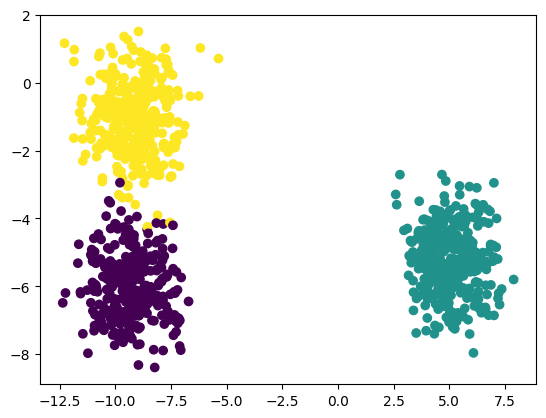

In [25]:
plt.scatter(x[:,0],x[:,1],c=y)

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [27]:
## Standardization

from sklearn.preprocessing import StandardScaler

scalar  = StandardScaler()


In [28]:
x_train_sc = scalar.fit_transform(x_train)
x_test_sc = scalar.transform(x_test)

In [29]:
from sklearn.cluster import KMeans

In [30]:
## Elbow Method to select the K value

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train_sc)
    wcss.append(kmeans.inertia_)

In [31]:
wcss

[1340.0,
 599.0442171281899,
 127.32439519598623,
 99.63828468061679,
 79.12395610665686,
 54.54971480875663,
 48.18124559734586,
 40.935560648636056,
 36.82967513891023,
 32.089450353956366]

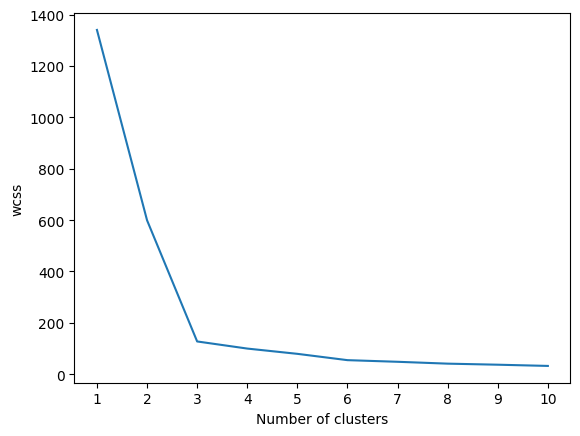

In [32]:
## plt elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [33]:
kmeans.fit_predict(x_train_sc)

array([1, 2, 2, 5, 3, 8, 9, 6, 0, 9, 0, 0, 1, 8, 0, 1, 3, 7, 3, 3, 7, 7,
       1, 8, 4, 2, 9, 2, 5, 0, 9, 4, 6, 3, 2, 6, 7, 5, 7, 1, 2, 1, 8, 1,
       9, 3, 6, 7, 8, 8, 1, 9, 7, 9, 8, 3, 7, 7, 5, 9, 3, 7, 1, 6, 6, 7,
       6, 8, 9, 6, 3, 8, 7, 6, 1, 9, 7, 8, 8, 2, 5, 9, 8, 1, 3, 6, 7, 6,
       4, 9, 4, 0, 8, 8, 6, 5, 6, 4, 1, 2, 1, 6, 8, 7, 3, 8, 8, 6, 5, 0,
       9, 6, 6, 6, 6, 2, 8, 6, 9, 4, 6, 6, 7, 8, 9, 5, 7, 3, 0, 9, 0, 3,
       9, 7, 8, 2, 7, 8, 6, 9, 8, 0, 8, 8, 4, 5, 1, 8, 2, 8, 3, 6, 5, 7,
       8, 8, 8, 9, 0, 6, 7, 6, 3, 9, 6, 3, 8, 2, 8, 3, 7, 5, 6, 7, 9, 1,
       9, 9, 3, 1, 7, 9, 3, 2, 4, 4, 3, 2, 5, 8, 1, 2, 4, 1, 8, 1, 7, 8,
       9, 1, 9, 4, 6, 9, 5, 9, 5, 9, 7, 9, 3, 8, 0, 9, 3, 4, 3, 5, 7, 5,
       6, 3, 8, 7, 0, 8, 7, 7, 6, 9, 8, 7, 6, 9, 8, 3, 9, 5, 3, 2, 8, 3,
       5, 3, 1, 4, 6, 1, 8, 6, 6, 6, 7, 7, 5, 1, 8, 8, 9, 1, 1, 0, 6, 6,
       0, 1, 7, 8, 3, 9, 4, 8, 5, 3, 8, 6, 6, 8, 6, 6, 1, 1, 0, 6, 8, 0,
       8, 7, 6, 8, 7, 6, 2, 0, 4, 8, 8, 3, 6, 6, 6,

In [34]:
y_pred = kmeans.predict(x_test_sc)

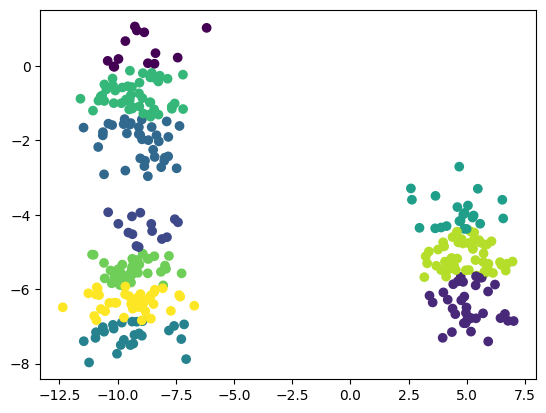

In [35]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

## Validating the k value

##### Kneelocator
##### Silhoutee scoring

In [36]:
from kneed import KneeLocator

kl = KneeLocator(range(1,11),wcss,curve = 'convex',direction='decreasing')

In [37]:
kl.elbow

np.int64(3)

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_coefficients = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train_sc)
    score = silhouette_score(x_train_sc,kmeans.labels_)
    silhouette_coefficients.append(score)

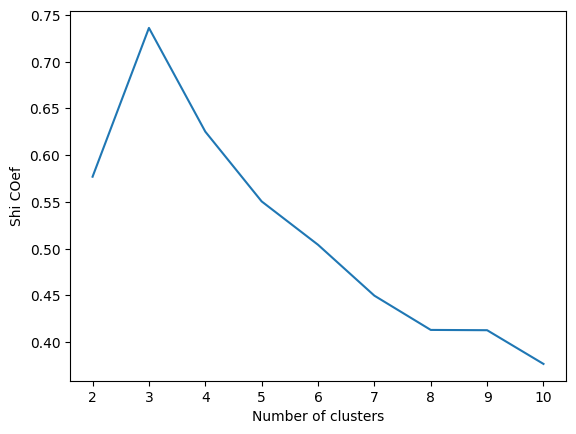

In [41]:
## plt elbow curve

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Shi COef")
plt.show()